In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

import geopandas as gpd

In [3]:
df_train = pd.read_parquet('/home/ubuntu/data/sar_ukho/intermediate_parquets/')

In [4]:
df_train.head()

,lat,lon,label,label_id,VH,is_padded,VV,water_depth,incidence_angle,distance_to_land,product_name,product_id,product_date
00A5_1,59.969097,-0.803654,other,OT1,"[0.005476318299770355, 0.004463224671781063, 0...",0,"[0.0316985547542572, 0.030376633629202843, 0.0...",-123.0,31.670874,19967.7,S1A_IW_GRDH_1SDV_20161216T173504_20161216T1735...,00A5,2016-12-16
00A5_2,59.938824,-0.151657,other,OT2,"[0.0030994645785540342, 0.00240622041746974, 0...",0,"[0.02245917171239853, 0.0262314286082983, 0.03...",-133.0,34.338449,52393.0,S1A_IW_GRDH_1SDV_20161216T173504_20161216T1735...,00A5,2016-12-16
00A5_3,59.568449,0.474738,other,OT3,"[0.005021506454795599, 0.005607369355857372, 0...",0,"[0.010754515416920185, 0.012144399806857109, 0...",-128.0,36.052081,103260.3,S1A_IW_GRDH_1SDV_20161216T173504_20161216T1735...,00A5,2016-12-16
00A5_4,60.222872,0.560078,other,OT4,"[0.0022426098585128784, 0.0022645180579274893,...",0,"[0.01614537090063095, 0.0191628597676754, 0.01...",-153.0,36.864819,74685.5,S1A_IW_GRDH_1SDV_20161216T173504_20161216T1735...,00A5,2016-12-16
00A5_5,60.223411,0.559808,other,OT5,"[0.0011863410472869873, 0.0014861199306324124,...",0,"[0.021587319672107697, 0.018297119066119194, 0...",-153.0,36.864819,74653.0,S1A_IW_GRDH_1SDV_20161216T173504_20161216T1735...,00A5,2016-12-16


In [5]:
df_train.label.value_counts()

other                         12528
turbine                       11462
oil_and_gas_infrastructure      884
Name: label, dtype: int64

In [7]:
turbine_df = df_train[df_train.label=='turbine']

In [11]:
turbine_df

,lat,lon,label,label_id,VH,is_padded,VV,water_depth,incidence_angle,distance_to_land,product_name,product_id,product_date
9641_274,51.735597,1.943517,turbine,WT1228,"[3.18454272019153e-06, 3.1845261219132226e-06,...",0,"[7.721256224613171e-06, 5.3322623898566235e-06...",-26.0,45.407339,46239.2,S1A_IW_GRDH_1SDV_20170118T055802_20170118T0558...,9641,2017-01-18
9641_275,51.735687,1.942529,turbine,WT1228,"[2.710889702939312e-06, 2.855866796380724e-06,...",0,"[3.1847323498368496e-06, 3.184715524184867e-06...",-26.0,45.407339,46193.5,S1A_IW_GRDH_1SDV_20170118T055802_20170118T0558...,9641,2017-01-18
9641_276,51.735956,1.943158,turbine,WT1228,"[2.176935822717496e-06, 1.5672026165702846e-06...",0,"[3.1846266210777685e-06, 3.184610022799461e-06...",-26.0,45.407339,46192.1,S1A_IW_GRDH_1SDV_20170118T055802_20170118T0558...,9641,2017-01-18
9641_277,51.741526,1.960855,turbine,WT1229,"[0.0031891101971268654, 0.0023887292481958866,...",0,"[0.005469559691846371, 0.006238806527107954, 0...",-30.0,45.407339,46360.8,S1A_IW_GRDH_1SDV_20170118T055802_20170118T0558...,9641,2017-01-18
9641_278,51.741526,1.959867,turbine,WT1229,"[0.0028394649270921946, 0.0021021633874624968,...",0,"[0.00282765063457191, 0.0035484572872519493, 0...",-30.0,45.407339,46321.9,S1A_IW_GRDH_1SDV_20170118T055802_20170118T0558...,9641,2017-01-18
9641_279,51.743502,1.948997,turbine,WT1688,"[8.907260053092614e-05, 0.00023203551245387644...",0,"[0.00010658751125447452, 0.0002688519307412207...",-21.0,45.407339,45716.4,S1A_IW_GRDH_1SDV_20170118T055802_20170118T0558...,9641,2017-01-18
9641_280,51.743502,1.947919,turbine,WT1688,"[1.3879642210667953e-05, 1.9314944438519888e-0...",0,"[2.5253650164813735e-05, 1.3074620255792979e-0...",-21.0,45.407339,45674.7,S1A_IW_GRDH_1SDV_20170118T055802_20170118T0558...,9641,2017-01-18
9641_281,51.748443,1.969838,turbine,WT1684,"[0.13468320667743683, 0.10083752870559692, 0.0...",0,"[2.8834893703460693, 1.676078200340271, 0.6659...",-30.0,45.407339,46092.5,S1A_IW_GRDH_1SDV_20170118T055802_20170118T0558...,9641,2017-01-18
9641_282,51.748533,1.968850,turbine,WT1684,"[0.019978174939751625, 0.010481507517397404, 0...",0,"[0.016508596017956734, 0.008227293379604816, 0...",-30.0,45.407339,46044.4,S1A_IW_GRDH_1SDV_20170118T055802_20170118T0558...,9641,2017-01-18
9641_283,51.748892,1.969299,turbine,WT1684,"[0.004534729290753603, 0.004264634568244219, 0...",0,"[0.008068452589213848, 0.0071370722725987434, ...",-30.0,45.407339,46030.2,S1A_IW_GRDH_1SDV_20170118T055802_20170118T0558...,9641,2017-01-18


In [10]:
turbine_df.label_id.value_counts()

WT671     27
WT1191    20
WT680     20
WT991     19
WT1684    19
WT1688    19
WT659     19
WT667     19
WT1430    18
WT1173    18
WT1732    18
WT677     18
WT1172    18
WT1162    18
WT1220    18
WT1674    18
WT234     18
WT977     18
WT1190    17
WT662     17
WT900     17
WT645     17
WT672     17
WT1188    17
WT652     17
WT1155    17
WT676     17
WT982     17
WT1214    17
WT1106    17
          ..
WT378      1
WT501      1
WT351      1
WT60       1
WT398      1
WT482      1
WT352      1
WT495      1
WT512      1
WT331      1
WT358      1
WT584      1
WT579      1
WT373      1
WT405      1
WT367      1
WT364      1
WT370      1
WT489      1
WT361      1
WT1788     1
WT580      1
WT508      1
WT61       1
WT356      1
WT485      1
WT389      1
WT391      1
WT51       1
WT344      1
Name: label_id, Length: 1631, dtype: int64

In [12]:
WT671_df = turbine_df[turbine_df.label_id=='WT671']

In [14]:
WT671_df.product_id.value_counts()

9A22    6
FABA    6
8AC7    4
EFB1    3
C813    3
F4E6    2
55E0    2
5E1F    1
Name: product_id, dtype: int64

In [27]:
df_9A22_WT671 = WT671_df[WT671_df.product_id=='9A22']

In [53]:
def crop_centre(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

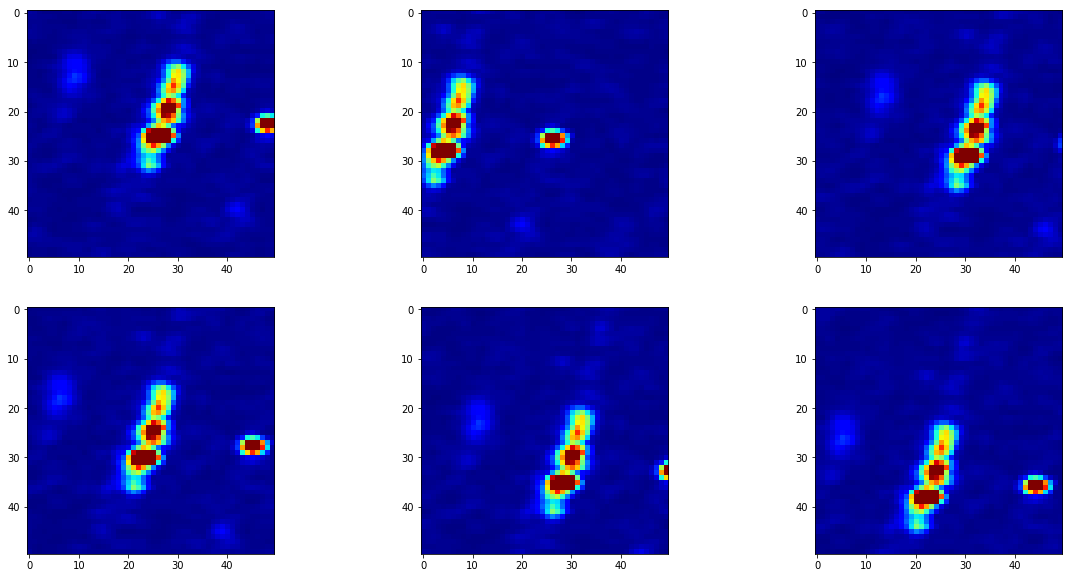

In [55]:

fig = plt.figure(figsize=(20,10))
plt.subplot(231)
plt.imshow(crop_center(df_9A22_WT671.VH.iloc[0].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)
plt.subplot(232)
plt.imshow(crop_center(df_9A22_WT671.VH.iloc[1].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)
plt.subplot(233)
plt.imshow(crop_center(df_9A22_WT671.VH.iloc[2].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)
plt.subplot(234)
plt.imshow(crop_center(df_9A22_WT671.VH.iloc[3].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)
plt.subplot(235)
plt.imshow(crop_center(df_9A22_WT671.VH.iloc[4].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)
plt.subplot(236)
plt.imshow(crop_center(df_9A22_WT671.VH.iloc[5].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)


In [42]:
df_9A22_WT671

,lat,lon,label,label_id,VH,is_padded,VV,water_depth,incidence_angle,distance_to_land,product_name,product_id,product_date
9A22_359,53.782518,0.144558,turbine,WT671,"[0.0016700953710824251, 0.0017867444548755884,...",0,"[0.020133059471845627, 0.018943002447485924, 0...",-15.0,39.506207,9170.7,S1B_IW_GRDH_1SDV_20170510T061316_20170510T0613...,9A22,2017-05-10
9A22_361,53.782788,0.146534,turbine,WT671,"[0.0010176071664318442, 0.0012111985124647617,...",0,"[0.011698508635163307, 0.008642596192657948, 0...",-15.0,39.506207,9294.0,S1B_IW_GRDH_1SDV_20170510T061316_20170510T0613...,9A22,2017-05-10
9A22_362,53.782877,0.144199,turbine,WT671,"[0.001195075805298984, 0.001259804586879909, 0...",0,"[0.00787883996963501, 0.010411861352622509, 0....",-15.0,39.506207,9175.0,S1B_IW_GRDH_1SDV_20170510T061316_20170510T0613...,9A22,2017-05-10
9A22_363,53.782967,0.144828,turbine,WT671,"[0.0017055859789252281, 0.001310952939093113, ...",0,"[0.013697615824639797, 0.01508576050400734, 0....",-15.0,39.506207,9214.4,S1B_IW_GRDH_1SDV_20170510T061316_20170510T0613...,9A22,2017-05-10
9A22_364,53.783416,0.144378,turbine,WT671,"[0.0018113600090146065, 0.0021083445753902197,...",0,"[0.00978818628937006, 0.009173399768769741, 0....",-16.0,39.506207,9220.1,S1B_IW_GRDH_1SDV_20170510T061316_20170510T0613...,9A22,2017-05-10
9A22_365,53.783686,0.144917,turbine,WT671,"[0.0010109737049788237, 0.0010627142619341612,...",0,"[0.015995267778635025, 0.01416788436472416, 0....",-16.0,39.506207,9266.5,S1B_IW_GRDH_1SDV_20170510T061316_20170510T0613...,9A22,2017-05-10


In [56]:
df_FABA_WT671 = WT671_df[WT671_df.product_id=='FABA']

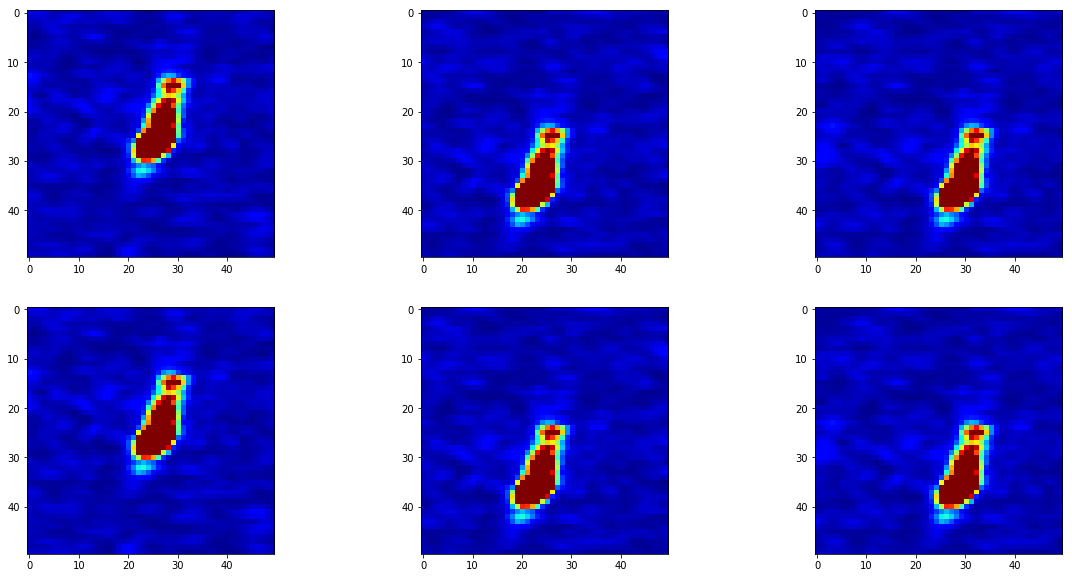

In [61]:
fig = plt.figure(figsize=(20,10))
plt.subplot(231)
plt.imshow(crop_center(df_FABA_WT671.VH.iloc[0].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)
plt.subplot(232)
plt.imshow(crop_center(df_FABA_WT671.VH.iloc[1].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)
plt.subplot(233)
plt.imshow(crop_center(df_FABA_WT671.VH.iloc[2].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)
plt.subplot(234)
plt.imshow(crop_center(df_FABA_WT671.VH.iloc[3].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)
plt.subplot(235)
plt.imshow(crop_center(df_FABA_WT671.VH.iloc[4].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)
plt.subplot(236)
plt.imshow(crop_center(df_FABA_WT671.VH.iloc[5].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)


In [58]:
df_FABA_WT671

,lat,lon,label,label_id,VH,is_padded,VV,water_depth,incidence_angle,distance_to_land,product_name,product_id,product_date
FABA_615,53.782807,0.144656,turbine,WT671,"[0.005202847067266703, 0.004827659111469984, 0...",0,"[0.04258747398853302, 0.035553738474845886, 0....",-15.0,30.919776,9195.3,S1B_IW_GRDH_1SDV_20170409T062122_20170409T0621...,FABA,2017-04-09
FABA_616,53.783705,0.144925,turbine,WT671,"[0.0024481427390128374, 0.0021365450229495764,...",0,"[0.06836037337779999, 0.0682402178645134, 0.05...",-16.0,30.919776,9268.7,S1B_IW_GRDH_1SDV_20170409T062122_20170409T0621...,FABA,2017-04-09
FABA_617,53.783705,0.144386,turbine,WT671,"[0.0020965056028217077, 0.0014440519735217094,...",0,"[0.021372605115175247, 0.027069179341197014, 0...",-16.0,30.919776,9240.1,S1B_IW_GRDH_1SDV_20170409T062122_20170409T0621...,FABA,2017-04-09
FABA_666,53.782807,0.144656,turbine,WT671,"[0.005202847067266703, 0.004827659111469984, 0...",0,"[0.04258747398853302, 0.035553738474845886, 0....",-15.0,30.919776,9195.3,S1B_IW_GRDH_1SDV_20170409T062122_20170409T0621...,FABA,2017-04-09
FABA_667,53.783705,0.144925,turbine,WT671,"[0.0024481427390128374, 0.0021365450229495764,...",0,"[0.06836037337779999, 0.0682402178645134, 0.05...",-16.0,30.919776,9268.7,S1B_IW_GRDH_1SDV_20170409T062122_20170409T0621...,FABA,2017-04-09
FABA_668,53.783705,0.144386,turbine,WT671,"[0.0020965056028217077, 0.0014440519735217094,...",0,"[0.021372605115175247, 0.027069179341197014, 0...",-16.0,30.919776,9240.1,S1B_IW_GRDH_1SDV_20170409T062122_20170409T0621...,FABA,2017-04-09


In [62]:
df_8AC7_WT671 = WT671_df[WT671_df.product_id=='8AC7']

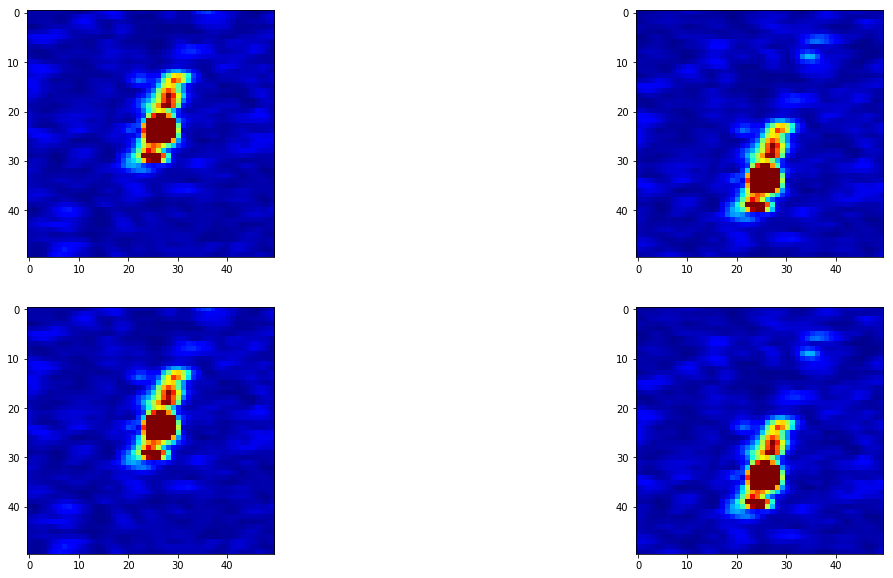

In [63]:
fig = plt.figure(figsize=(20,10))
plt.subplot(221)
plt.imshow(crop_center(df_8AC7_WT671.VH.iloc[0].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)
plt.subplot(222)
plt.imshow(crop_center(df_8AC7_WT671.VH.iloc[1].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)
plt.subplot(223)
plt.imshow(crop_center(df_8AC7_WT671.VH.iloc[2].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)
plt.subplot(224)
plt.imshow(crop_center(df_8AC7_WT671.VH.iloc[3].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)

In [64]:
df_8AC7_WT671

,lat,lon,label,label_id,VH,is_padded,VV,water_depth,incidence_angle,distance_to_land,product_name,product_id,product_date
8AC7_626,53.782918,0.144715,turbine,WT671,"[0.0026245724875479937, 0.003189203329384327, ...",0,"[0.019160380586981773, 0.017397379502654076, 0...",-15.0,30.917651,9205.7,S1B_IW_GRDH_1SDV_20170527T062125_20170527T0621...,8AC7,2017-05-27
8AC7_627,53.783816,0.144805,turbine,WT671,"[0.0034775107633322477, 0.003889602841809392, ...",0,"[0.04027269780635834, 0.04657761752605438, 0.0...",-16.0,30.917651,9269.7,S1B_IW_GRDH_1SDV_20170527T062125_20170527T0621...,8AC7,2017-05-27
8AC7_679,53.782918,0.144715,turbine,WT671,"[0.0026245724875479937, 0.003189203329384327, ...",0,"[0.019160380586981773, 0.017397379502654076, 0...",-15.0,30.917651,9205.7,S1B_IW_GRDH_1SDV_20170527T062125_20170527T0621...,8AC7,2017-05-27
8AC7_680,53.783816,0.144805,turbine,WT671,"[0.0034775107633322477, 0.003889602841809392, ...",0,"[0.04027269780635834, 0.04657761752605438, 0.0...",-16.0,30.917651,9269.7,S1B_IW_GRDH_1SDV_20170527T062125_20170527T0621...,8AC7,2017-05-27


In [65]:
df_EFB1_WT671 = WT671_df[WT671_df.product_id=='EFB1']
df_C813_WT671 = WT671_df[WT671_df.product_id=='C813']

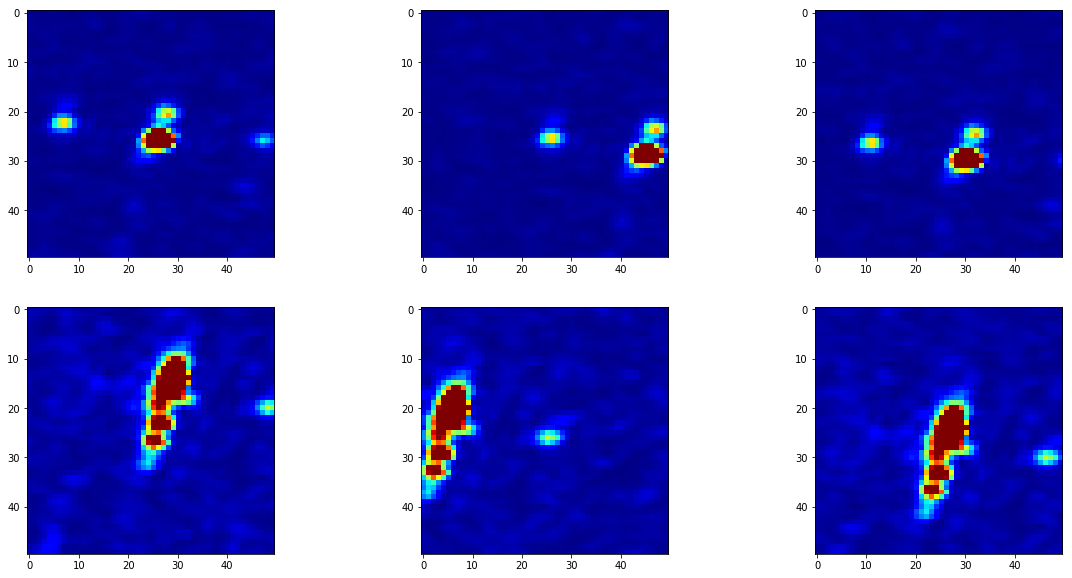

In [66]:
fig = plt.figure(figsize=(20,10))
plt.subplot(231)
plt.imshow(crop_center(df_EFB1_WT671.VH.iloc[0].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)
plt.subplot(232)
plt.imshow(crop_center(df_EFB1_WT671.VH.iloc[1].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)
plt.subplot(233)
plt.imshow(crop_center(df_EFB1_WT671.VH.iloc[2].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)
plt.subplot(234)
plt.imshow(crop_center(df_C813_WT671.VH.iloc[0].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)
plt.subplot(235)
plt.imshow(crop_center(df_C813_WT671.VH.iloc[1].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)
plt.subplot(236)
plt.imshow(crop_center(df_C813_WT671.VH.iloc[2].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)


In [69]:
df_EFB1_WT671

,lat,lon,label,label_id,VH,is_padded,VV,water_depth,incidence_angle,distance_to_land,product_name,product_id,product_date
EFB1_350,53.782786,0.144641,turbine,WT671,"[0.0016034898580983281, 0.0014045729767531157,...",0,"[0.0014024035772308707, 0.001537296804599464, ...",-15.0,39.498725,9192.6,S1B_IW_GRDH_1SDV_20170709T061319_20170709T0613...,EFB1,2017-07-09
EFB1_351,53.783056,0.142934,turbine,WT671,"[0.0013871341943740845, 0.0014458006480708718,...",0,"[0.001669053453952074, 0.0018552079563960433, ...",-15.0,39.498725,9119.6,S1B_IW_GRDH_1SDV_20170709T061319_20170709T0613...,EFB1,2017-07-09
EFB1_352,53.783145,0.144282,turbine,WT671,"[0.0018347225850448012, 0.0018649646081030369,...",0,"[0.0013003131607547402, 0.001273619127459824, ...",-15.0,39.498725,9197.1,S1B_IW_GRDH_1SDV_20170709T061319_20170709T0613...,EFB1,2017-07-09


In [70]:
df_C813_WT671

,lat,lon,label,label_id,VH,is_padded,VV,water_depth,incidence_angle,distance_to_land,product_name,product_id,product_date
C813_372,53.782254,0.144487,turbine,WT671,"[0.0016207513399422169, 0.0019256287487223744,...",0,"[0.012765152379870415, 0.012540207244455814, 0...",-15.0,39.533965,9149.7,S1A_IW_GRDH_1SDV_20170504T061401_20170504T0614...,C813,2017-05-04
C813_374,53.782793,0.146553,turbine,WT671,"[0.002471715211868286, 0.0024395149666815996, ...",0,"[0.03485209122300148, 0.03153393417596817, 0.0...",-15.0,39.533965,9295.4,S1A_IW_GRDH_1SDV_20170504T061401_20170504T0614...,C813,2017-05-04
C813_376,53.783153,0.144666,turbine,WT671,"[0.0029618286062031984, 0.0021526452619582415,...",0,"[0.021406160667538643, 0.021434033289551735, 0...",-15.0,39.533965,9218.0,S1A_IW_GRDH_1SDV_20170504T061401_20170504T0614...,C813,2017-05-04


In [67]:
df_F4E6_WT671 = WT671_df[WT671_df.product_id=='F4E6']
df_55E0_WT671 = WT671_df[WT671_df.product_id=='55E0']
df_5E1F_WT671 = WT671_df[WT671_df.product_id=='5E1F']

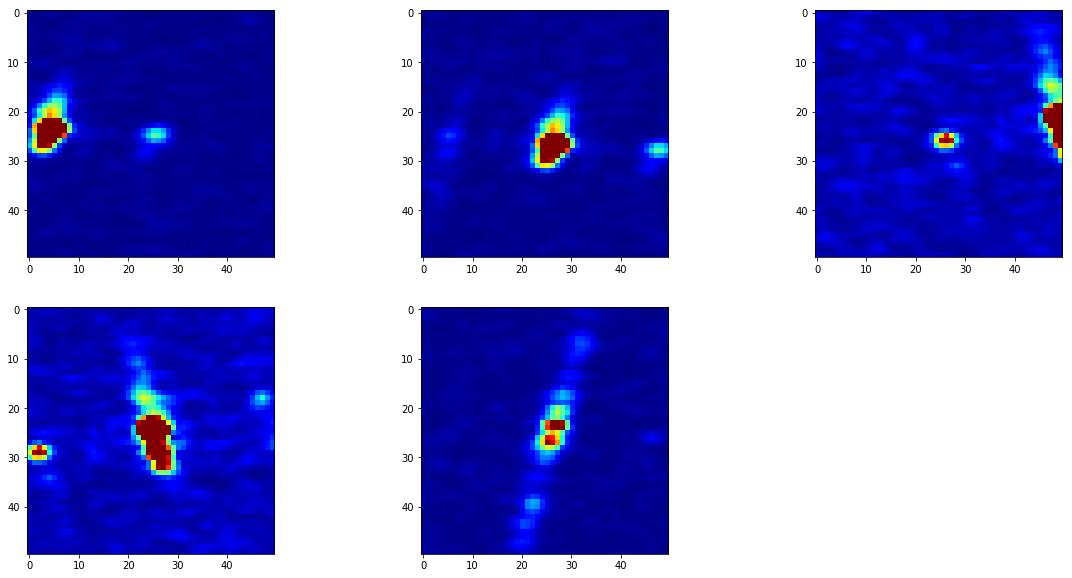

In [72]:
fig = plt.figure(figsize=(20,10))
plt.subplot(231)
plt.imshow(crop_center(df_F4E6_WT671.VH.iloc[0].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)
plt.subplot(232)
plt.imshow(crop_center(df_F4E6_WT671.VH.iloc[1].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)
plt.subplot(233)
plt.imshow(crop_center(df_55E0_WT671.VH.iloc[0].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)
plt.subplot(234)
plt.imshow(crop_center(df_55E0_WT671.VH.iloc[1].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)
plt.subplot(235)
plt.imshow(crop_center(df_5E1F_WT671.VH.iloc[0].reshape(240,240), 50, 50), cmap='jet', vmin=0, vmax=0.1)